## Lake Zug CTD Transect & Water Samples Plan (12.1.2025)

In [1]:
# imports
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Lake Zug bathymetry
bathy = xr.open_dataset('../../../../../data/lake_zug/bathymetry/zugersee_bathy.nc')

In [74]:
# planned locations
profile_locs = pd.DataFrame({
    'loc': [f'P{x}' for x in range(1, 13)] + ["P5'", "P5''"],
    'xsc': [679803, 679803, 679663, 679415, 679505, 680030, 680150, 680223, 680409, 680814, 681350, 681909] + [679330, 679700],
    'ysc': [224100, 222690, 221650, 220433, 219544, 218872, 218462, 218126, 217437, 216239, 214957, 213760] + [219544, 219100]
})

profile_locs['xsc'] += int(2e6)
profile_locs['ysc'] += int(1e6)

profile_locs['depth'] = [bathy.sel(xsc=row.xsc, ysc=row.ysc).depth.item() for _, row in profile_locs.iterrows()]

profile_locs.sort_values('ysc', ascending=False).reset_index(drop=True)

,loc,xsc,ysc,depth
0,P1,2679803,1224100,48.48001
1,P2,2679803,1222690,70.04001
2,P3,2679663,1221650,98.44000
3,P4,2679415,1220433,121.20001
4,P5,2679505,1219544,127.62000
5,P5',2679330,1219544,136.19000
6,P5'',2679700,1219100,167.87001
7,P6,2680030,1218872,178.16000
8,P7,2680150,1218462,185.75000
9,P8,2680223,1218126,193.75000


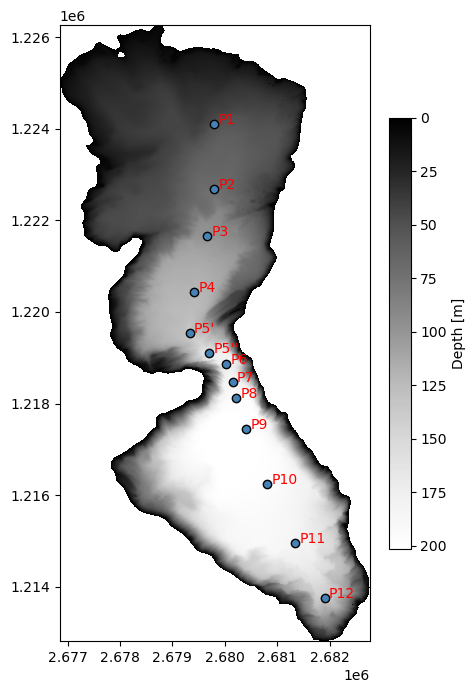

In [69]:
fig, ax = plt.subplots(figsize=(5, 8))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# CTD locations
for _, row in profile_locs.iterrows():
    if row['loc'] != 'P5':
        ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
        ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

plt.show()

In [72]:
mooring_locs = pd.DataFrame({
    'loc': ['LZC', 'LZE', 'LZW', 'LZN'],
    'xsc': [2680084, 2680314, 2679912, 2679436],
    'ysc': [1218840, 1218883, 1218760, 1219384]
})
# LZW ysc = 1218770?
mooring_locs

,loc,xsc,ysc
0,LZC,2680084,1218840
1,LZE,2680314,1218883
2,LZW,2679912,1218760
3,LZN,2679436,1219384


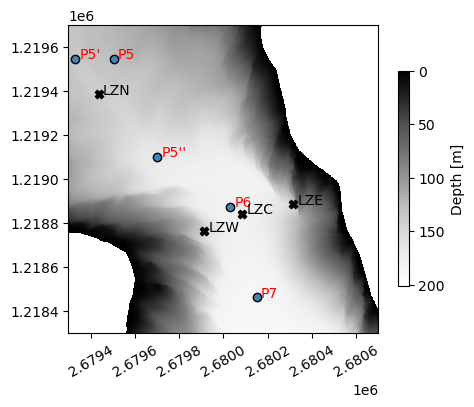

In [71]:
fig, ax = plt.subplots(figsize=(5, 4))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# CTD locations
for _, row in profile_locs.iterrows():
    ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

# mooring locations
for _, row in mooring_locs.iterrows():
    # deployed locations
    ax.scatter(row.xsc, row.ysc, c='black', edgecolor='black', marker='X')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='black', xytext=(3, 0), textcoords='offset points')

ax.tick_params(axis='x', rotation=30)

ax.set_xlim(2679300, 2680700)
ax.set_ylim(1218300, 1219700)

plt.show()

In [96]:
ws_locs = pd.DataFrame({
    'loc': ['WSN', 'WSC', 'WSS'],
    'loc_p': ['P4', 'P6', 'P10'],
    'xsc': [679415, 680030, 680814],
    'ysc': [220433, 218872, 216239]
})

ws_locs['xsc'] += int(2e6)
ws_locs['ysc'] += int(1e6)

ws_locs['depth'] = [bathy.sel(xsc=row.xsc, ysc=row.ysc).depth.item() for _, row in ws_locs.iterrows()]
ws_locs

,loc,loc_p,xsc,ysc,depth
0,WSN,P4,2679415,1220433,121.20001
1,WSC,P6,2680030,1218872,178.16000
2,WSS,P10,2680814,1216239,196.03000


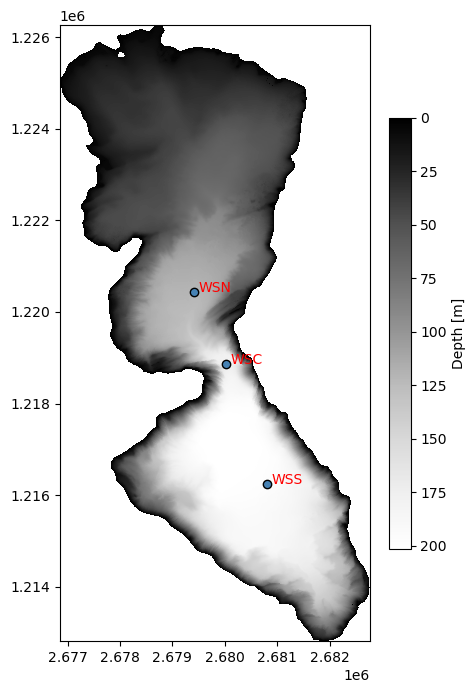

In [97]:
fig, ax = plt.subplots(figsize=(5, 8))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# Water sample locations
for _, row in ws_locs.iterrows():
    ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
    ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

plt.show()